In [1]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from gem2cue import utils as cue
from cobra.io import read_sbml_model
from tqdm import tqdm


model = read_sbml_model("../model/Rpom_05.xml")
ex_glc = model.reactions.get_by_id("EX_glc")
ex_ace = model.reactions.get_by_id("EX_ac")
ex_co2 = model.reactions.get_by_id("EX_co2")
biomass = model.reactions.get_by_id("Rpom_hwa_biomass")
atpm = model.reactions.get_by_id("ATPM")
atpm.bounds = (5, 5)

https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id


In [3]:
glc_supply = 10
ace_supply = 1

uptake_rate = []
opt_co2_ex = []
opt_bge = []
opt_mu = []
tradeoffs = np.linspace(0, 30, 100)
for tradeoff in tqdm(tradeoffs):
    with model:
        # Need to fix glucose uptake rate in order to force growth
        ex_glc.bounds = (-glc_supply, 0)
        # ex_ace.bounds = (-ace_supply, -ace_supply)
        model.objective = {
            biomass : tradeoff,  # maximize growth
            ex_co2 : -1  # minimize CO2 production
        }
        sol = model.optimize()

        c_ex_rxns = cue.get_c_ex_rxns(model)
        c_uptake, c_secretion, c_biomass = cue.get_c_ex_rxn_fluxes(model, sol, c_ex_rxns, "Rpom_hwa_biomass", "cobrapy")
        
        bge = cue.calculate_bge(c_secretion, c_biomass, "EX_co2")
        mu = sol["Rpom_hwa_biomass"]

        uptake_rate.append(sol["EX_glc"])
        opt_co2_ex.append(sol["EX_co2"])
        opt_bge.append(bge)
        opt_mu.append(mu)


  0%|          | 0/100 [00:00<?, ?it/s]/home/myang42/projects/GEM2CUE/gem2cue/utils.py:337: RuntimeWarning: invalid value encountered in scalar divide
  bge = biomass_c / (biomass_c + co2_ex)
  1%|          | 1/100 [00:00<00:10,  9.25it/s]/home/myang42/projects/GEM2CUE/gem2cue/utils.py:337: RuntimeWarning: invalid value encountered in scalar divide
  bge = biomass_c / (biomass_c + co2_ex)
/home/myang42/projects/GEM2CUE/gem2cue/utils.py:337: RuntimeWarning: invalid value encountered in scalar divide
  bge = biomass_c / (biomass_c + co2_ex)
/home/myang42/projects/GEM2CUE/gem2cue/utils.py:337: RuntimeWarning: invalid value encountered in scalar divide
  bge = biomass_c / (biomass_c + co2_ex)
/home/myang42/projects/GEM2CUE/gem2cue/utils.py:337: RuntimeWarning: invalid value encountered in scalar divide
  bge = biomass_c / (biomass_c + co2_ex)
/home/myang42/projects/GEM2CUE/gem2cue/utils.py:337: RuntimeWarning: invalid value encountered in scalar divide
  bge = biomass_c / (biomass_c + co2_

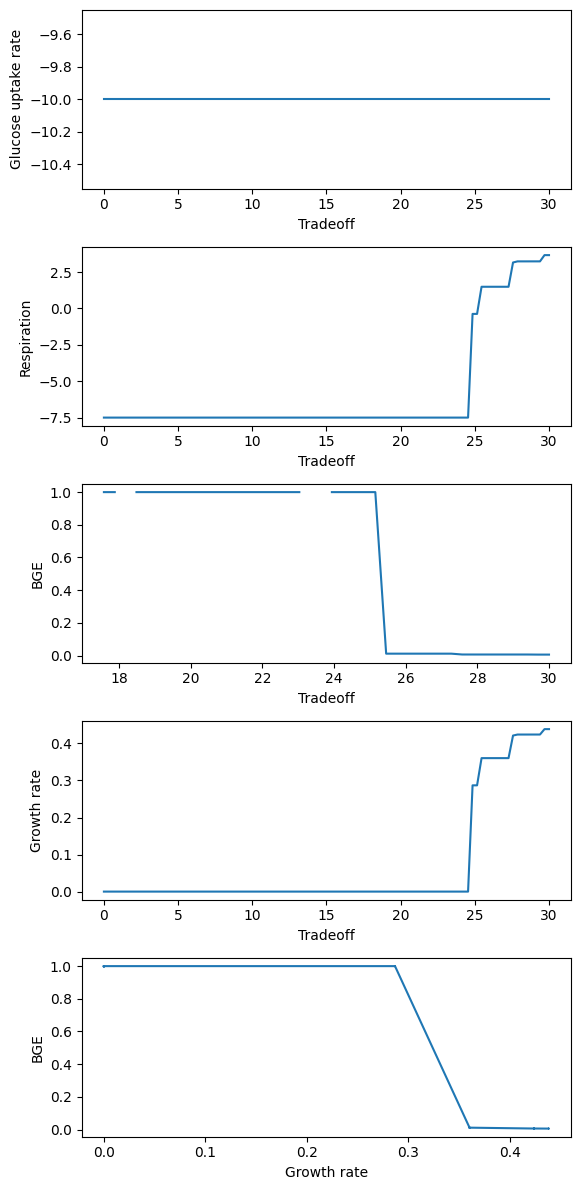

In [4]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, 1)

ax0.plot(tradeoffs, uptake_rate)
ax0.set_xlabel("Tradeoff")
ax0.set_ylabel("Glucose uptake rate")
# ax0.set_yscale("log")

ax1.plot(tradeoffs, opt_co2_ex)
ax1.set_xlabel("Tradeoff")
ax1.set_ylabel("Respiration")
# ax1.set_yscale("log")

ax2.plot(tradeoffs, opt_bge)
ax2.set_xlabel("Tradeoff")
ax2.set_ylabel("BGE")
# ax2.set_yscale("log")

ax3.plot(tradeoffs, opt_mu)
ax3.set_xlabel("Tradeoff")
ax3.set_ylabel("Growth rate")
# ax3.set_yscale("log")

ax4.plot(opt_mu, opt_bge)
ax4.set_xlabel("Growth rate")
ax4.set_ylabel("BGE")
# ax4.set_xscale("log")
# ax4.set_yscale("log")

fig.set_size_inches(6, 12)
fig.tight_layout()
